<a href="https://colab.research.google.com/github/tashinam/piano_generation/blob/main/ToyDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
from torch.distributions.categorical import Categorical
import torch
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct

In [93]:
from IPython.display import HTML, Image
from google.colab.output import eval_js
from base64 import b64decode

canvas_html = """
<canvas width=%d height=%d></canvas>
<button>Finish</button>
<script>
var canvas = document.querySelector('canvas')
var ctx = canvas.getContext('2d')
ctx.fillStyle = "blue";
ctx.fillRect(0, 0, canvas.width, canvas.height);
ctx.lineWidth = %d
var button = document.querySelector('button')
var mouse = {x: 0, y: 0}
var mousex = []
var mousey = []
canvas.addEventListener('mousemove', function(e) {
  mouse.x = e.pageX - this.offsetLeft
  mouse.y = e.pageY - this.offsetTop
})
canvas.onmousedown = ()=>{
  ctx.beginPath()
  ctx.moveTo(mouse.x, mouse.y)
  canvas.addEventListener('mousemove', onPaint)
}
canvas.onmouseup = ()=>{
  canvas.removeEventListener('mousemove', onPaint)
}
var onPaint = ()=>{
  ctx.lineTo(mouse.x, mouse.y)
  ctx.stroke()
  mousex.push(mouse.x)
  mousey.push(mouse.y)
}
var data = new Promise(resolve=>{
  button.onclick = ()=>{
    resolve(canvas.toDataURL('image/png'))
  }
})

</script>
"""

def draw(filename='drawing.png', w=400, h=200, line_width=1):
  display(HTML(canvas_html % (w, h, line_width)))
  data = eval_js("data")
  liney = eval_js("mousey")
  linex = eval_js("mousex")
  # binary = b64decode(data.split(',')[1])
  # with open(filename, 'wb') as f:
  #   f.write(binary)
  return linex, [62-(y/9) for y in liney]

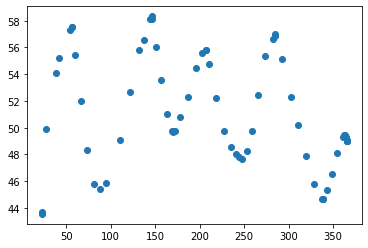

In [94]:
linex, liney = draw(filename = "line_sketch.png", w=400, h=200, line_width=15)
plt.scatter(linex,liney)

[10.72802917 -8.94327497 -2.1315669 ]


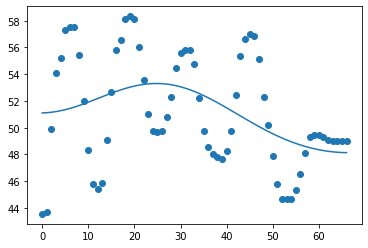

In [100]:
y = liney
y_longer = [x for x in y for a in range(1)]
xs = range(len(y_longer))
ys = y_longer
N = len(y_longer)
cs = dct(ys, norm='ortho')
print(cs[1:4])
za = idct(cs[:4], n=N, norm='ortho')
plt.scatter(xs,ys)
plt.plot(xs,za)
plt.show()

In [ ]:
def alpha(k, N):
    if k == 0:
        return 1 / np.sqrt(N)
    else:
        return np.sqrt(2/N)
    
def cosine(n, k, N):
    return alpha(k, N) * np.cos(np.pi * (2*n + 1) * k / (2*N))

In [ ]:
# pairs = np.zeros((88*88,2))

In [ ]:
# for i in range(88):
#   for j in range(88):
#     pairs[i*88+j]=np.array([i,j])

In [ ]:
# conditions = np.zeros((88*88,1))

In [ ]:
# for e,(i,j) in enumerate(pairs):
#   if i>j:
#     conditions[e]=0
#   if i==j:
#     conditions[e]=1
#   if i<j:
#     conditions[e]=2

Transition Matrix

In [ ]:
# octave = np.array([[.30,.20,.05,.10,.10,.05,.05,.15],
#                    [.15,.30,.15,.10,.10,.10,.05,.05],
#                    [.10,.15,.30,.15,.05,.05,.15,.05],
#                    [.10,.05,.15,.30,.15,.05,.05,.15],
#                    [.15,.10,.05,.15,.30,.15,.05,.05],
#                    [.10,.15,.05,.05,.15,.30,.15,.05],
#                    [.10,.05,.15,.05,.05,.15,.30,.15],
#                    [.10,.05,.05,.15,.10,.05,.20,.30]])
# print(np.sum(octave,1), np.sum(octave,0))

[1. 1. 1. 1. 1. 1. 1. 1.] [1.1  1.05 0.95 1.05 1.   0.9  1.   0.95]


In [ ]:
# twoctave = np.array([[6,4,1,2,2,1,1,3],
#                      [3,6,3,2,2,2,1,1],
#                      [2,3,6,3,1,1,3,1],
#                      [2,1,3,6,3,1,1,3],
#                      [3,2,1,3,6,3,1,1],
#                      [2,3,1,1,3,6,3,1],
#                      [2,1,3,1,1,3,6,3],
#                      [2,1,1,3,2,1,4,6]])
# twoctave = twoctave/20
# print(np.sum(twoctave,1), np.sum(twoctave,0))

[1. 1. 1. 1. 1. 1. 1. 1.] [1.1  1.05 0.95 1.05 1.   0.9  1.   0.95]


In [ ]:
twoctave = np.array([[8,8,3,5,6,3,2,6,1,1,1,1,1,1,3],
                     [8,8,8,2,4,6,2,2,4,1,1,1,1,1,1],
                     [2,7,8,7,3,4,6,2,2,4,1,1,1,1,1],
                     [3,2,7,8,7,2,3,6,2,2,4,1,1,1,1],
                     [4,3,2,7,8,7,2,2,4,2,2,4,1,1,1],
                     [1,4,2,2,7,8,7,2,3,4,2,2,4,1,1],
                     [2,2,4,2,2,6,8,6,2,3,4,2,2,4,1],
                     [3,2,2,4,2,2,6,8,6,2,2,4,2,2,3],
                     [1,4,2,2,4,3,1,6,8,6,2,3,4,2,2],
                     [1,1,4,2,2,4,3,2,6,8,6,2,3,4,2],
                     [1,1,1,4,2,2,4,3,2,6,8,7,2,3,4],
                     [1,1,1,1,4,2,2,4,3,2,8,8,7,2,4],
                     [1,1,1,1,1,4,2,2,4,4,2,8,8,8,3],
                     [1,1,1,1,1,1,4,2,2,5,4,3,8,8,8],
                     [3,1,1,1,1,1,1,5,3,3,6,5,3,8,8]])
twoctave = twoctave/50
print(np.sum(twoctave,1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
seq_len = 16
num_seqs = 5000
seqs = np.zeros((num_seqs,seq_len),dtype='int64')
octave_sampler = Categorical(probs=torch.from_numpy(twoctave)) # generates different transition probabilities (axis 1) based on the previous note (axis 0).
for s in range(num_seqs): # for each sequence
  for pos in range(seq_len): # for each note in the sequence
    if pos == 0: # start all sequences as if C was previous note
      seqs[s,pos]=octave_sampler.sample()[0] 
    else: # choose sample from the distribution of the last note
      seqs[s,pos]=octave_sampler.sample()[seqs[s,pos-1]] 
print(seqs)

[[ 0  6  1 ... 14  3  4]
 [ 7 11 10 ...  1  1  2]
 [ 7  1  0 ...  5  1  3]
 ...
 [ 1  0  3 ...  6 13  5]
 [11  7  6 ...  0  1  1]
 [ 0  4  4 ...  4 11  7]]


Note Pairs

In [ ]:
def best_fit_slope_and_intercept(xs,ys):
    m = (((np.mean(xs)*np.mean(ys)) - np.mean(xs*ys)) /
         ((np.mean(xs)*np.mean(xs)) - np.mean(xs*xs)))
    
    b = np.mean(ys) - m*np.mean(xs)
    
    return m, b

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=16)
pca.fit(seqs)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.15445054 0.13416171 0.11740887 0.0997733  0.07747048 0.06884743
 0.05562715 0.04760596 0.04168167 0.03494172 0.03296608 0.03086719
 0.02794478 0.02674944 0.02525708 0.02424658]
[455.59069678 424.61410968 397.21952343 366.17381772 322.66230873
 304.1753389  273.41574908 252.93609506 236.67517522 216.69668815
 210.48143636 203.67077121 193.78959605 189.59961345 184.23481925
 180.51171011]


<BarContainer object of 16 artists>

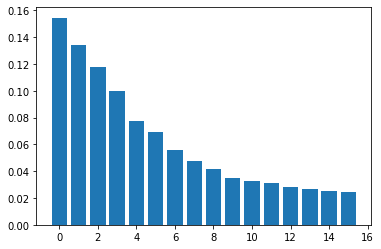

In [ ]:
plt.bar(range(16),pca.explained_variance_ratio_)

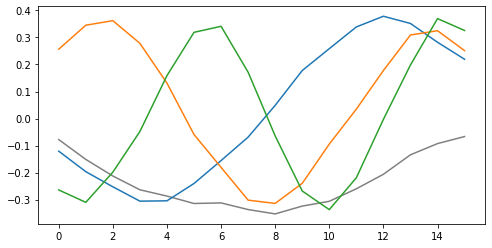

In [ ]:
contours = seqs
n_c = 6
def show_pca(contours):
    pca = PCA(n_components=16)
    pca.fit(contours)
    N = contours.shape[1]
    xs = np.arange(0, N)
    for k in range(4):
        comp = pca.components_[k]
        # v = cosine(xs, k, N)
        
        # if np.linalg.norm(-1*comp - v) < np.linalg.norm(comp - v):
            # comp = -1 * comp
    
        color = '0.5' if k == 0 else f'C{k-1}'
        plt.plot(xs, comp, label=f'$C_{k}$', c=color)
        # plt.plot(xs, v, c=color, ls='--', alpha=.5, lw=.5)

plt.figure(figsize=(8, 4))
show_pca(contours)

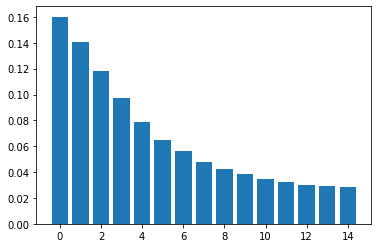

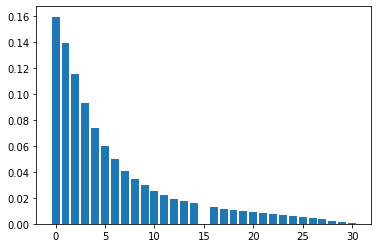

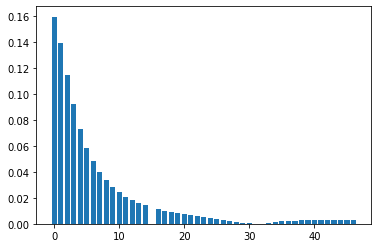

In [ ]:
for i in range(1,4):
  rpt = i
  tot_var = np.zeros((1,(seq_len*rpt)-1))
  for i in range(num_seqs):
    y = seqs[i]
    y_longer = [x for x in y for a in range(rpt)]
    xs = range(len(y_longer))
    ys = y_longer
    N = len(y_longer)
    cs = dct(ys, norm='ortho')
    tot_var+=cs[1:]**2
  # print(tot_var/np.sum(tot_var))
  plt.bar(list(range(len(tot_var[0]))),tot_var[0]/np.sum(tot_var))
  plt.show()

[17.04540445  4.01279145 -5.73354117]


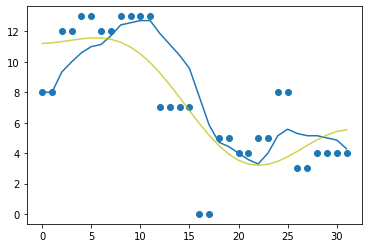

[13.0379848  -5.62691825  0.81465327]


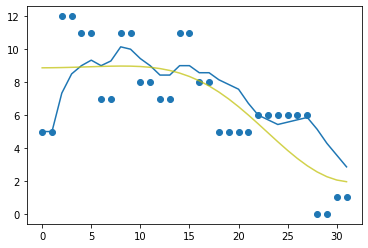

[-4.28824578  5.51565888 -0.19894425]


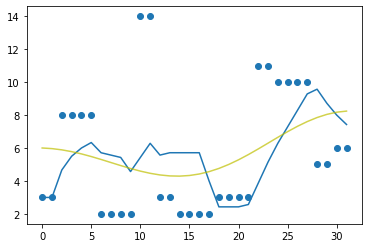

[ -9.32521753  -3.2117014  -10.68419568]


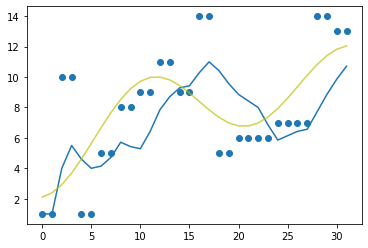

[ 4.56559181 12.0263528   1.036959  ]


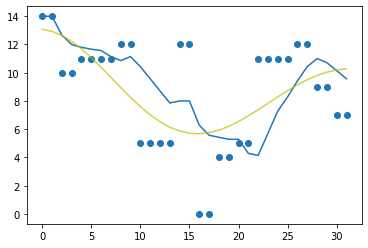

In [ ]:
for i in range(num_seqs):
  y = seqs[i]
  y_longer = [x for x in y for a in range(2)]
  xs = range(len(y_longer))
  ys = y_longer
  N = len(y_longer)
  cs = dct(ys, norm='ortho')

  low = 0
  ma = []
  k = 5
  start = 0
  for i in range(len(ys)):
    ma.append(np.array(ys[low:i+1]).mean())
    if i>=k:
      low = i-k
  plt.plot(xs,ma)

  print(cs[1:4])
  plt.scatter(xs[:],ys[:])
  za = idct(cs[:], n=N, norm='ortho')
  plt.plot(xs, za, alpha=.7, lw=1.5, c='y')
  plt.show()


In [ ]:
conds = np.zeros((5000,3))
for i in range(num_seqs):
  y = seqs[i]
  y_longer = [x for x in y for a in range(2)]
  xs = range(len(y_longer))
  ys = y_longer
  N = len(y_longer)
  cs = dct(ys, norm='ortho')
  conds[i,:]=cs[1:4]
conds

array([[-8.32817142,  7.12657601,  1.56510569],
       [20.41626396,  0.62956164, -8.24642942],
       [-5.55868844, -9.44375768,  9.42538712],
       ...,
       [-9.92237778,  2.20263708, -7.97258039],
       [15.63043938, -9.03458317,  2.0281331 ],
       [-6.15427821, -4.7235631 , -8.64561519]])

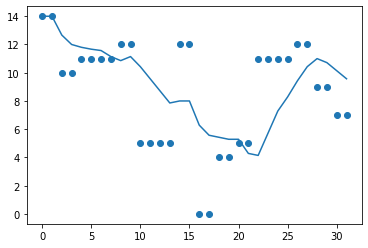

In [ ]:

plt.scatter(xs,ys)

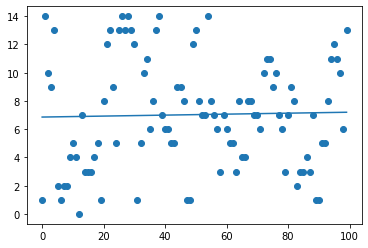

In [ ]:
ys = seqs[4]
plt.scatter(xs,seqs[4])
m, b = best_fit_slope_and_intercept(xs,seqs[4])
line = [(m*x)+b for x in xs]
plt.plot(xs,line)

In [ ]:
for s in range(seqs.shape[0]):
  for i,x in enumerate(seqs[s]):
      seqs[s][i]=note2scale(x)

In [ ]:
xs = np.array(range(16))
ys = seqs[0]
# ms = np.zeros((num_seqs,1))
ms= []
m, b = best_fit_slope_and_intercept(xs,ys)
line = [(m*x)+b for x in xs]
for seq in seqs:
  m, _ = best_fit_slope_and_intercept(xs,seq)
  ms.append(m)
# plt.scatter(xs,ys)
# plt.plot(xs,line)

In [ ]:
a = [-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8]
len(a)

9

In [ ]:
ms = np.array(ms)
n = np.zeros(10)
for m in ms:
  if m<a[0]:
    n[0]+=1
  for x in range(1,len(a)-1):
    if a[x-1]<m<a[x]:
      n[1]+=1
  if m>a[8]:
    n[2]+=1
print(n)

[    0. 49998.     0.     0.     0.     0.     0.     0.     0.     0.]


In [ ]:
m_classes

In [ ]:
def note2scale(x):
  n2s = {'0':60,'1':62,'2':64,'3':65,'4':67,'5':69,'6':71,'7':72,'8':74,'9':76,'10':77,'11':79,'12':81,'13':83,'14':84}
  return n2s.get(str(int(x)),x)

In [ ]:
for s in range(seqs.shape[0]):
  for i,x in enumerate(seqs[s]):
      seqs[s][i]=note2scale(x)

In [ ]:
pairs = seqs

In [ ]:
conditions=np.array(m_classes,ndmin=2).T

In [ ]:
conditions

array([[0],
       [2],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [ ]:
# seqs = np.zeros((1000,2),dtype=int)
# for s in range(seqs.shape[0]):
#   seq = octave_sampler.sample()
#   seq = seq[:2]
#   for i,x in enumerate(seq):
#     if x==0:
#       seqs[s][i]=60
#     if x==1:
#       seqs[s][i]=62
#     if x==2:
#       seqs[s][i]=64
#     if x==3:
#       seqs[s][i]=65
#     if x==4:
#       seqs[s][i]=67
#     if x==5:
#       seqs[s][i]=69
#     if x==6:
#       seqs[s][i]=71
#     if x==7:
#       seqs[s][i]=72

In [ ]:
# pairs = seqs
# conditions = np.zeros((1000,1))
# for e,(i,j) in enumerate(pairs):
#   if i>j:
#     conditions[e]=0
#   if i==j:
#     conditions[e]=1
#   if i<j:
#     conditions[e]=2

Convert to csv

In [ ]:
pairs = pairs.astype(int)

In [ ]:
conditions = conditions.astype(int)

In [ ]:
pairs = pd.DataFrame(pairs)

In [ ]:
conditions = pd.DataFrame(conditions)

In [ ]:
conditions = pd.DataFrame(conds)

In [ ]:
pairs

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0,6,1,1,0,0,1,1,0,3,2,3,2,14,3,4
1,7,11,10,11,14,14,6,7,2,0,3,4,5,1,1,2
2,7,1,0,1,3,7,7,3,4,11,10,12,4,5,1,3
3,4,0,3,7,0,0,1,0,3,7,6,0,0,12,1,5
4,7,6,4,13,3,7,6,3,9,5,4,4,4,2,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,14,9,1,13,11,12,12,11,10,14,9,10,10,10,9,0
4996,0,3,4,3,2,5,4,4,3,0,4,2,7,2,5,8
4997,1,0,3,2,3,8,1,9,0,2,2,6,5,6,13,5
4998,11,7,6,9,10,11,1,11,13,8,5,2,3,0,1,1


In [ ]:
conditions

,0,1,2
0,-8.328171,7.126576,1.565106
1,20.416264,0.629562,-8.246429
2,-5.558688,-9.443758,9.425387
3,-4.665615,3.199613,2.822497
4,6.583887,-0.973813,-0.669529
...,...,...,...
4995,4.934228,-9.296406,4.198600
4996,-4.730797,1.896073,-5.549379
4997,-9.922378,2.202637,-7.972580
4998,15.630439,-9.034583,2.028133


In [ ]:
pairs.to_csv('/content/drive/MyDrive/Colab Notebooks/piano_generation/16_seqs_curve.csv',header=False,index=False)
conditions.to_csv('/content/drive/MyDrive/Colab Notebooks/piano_generation/16_conditions_curve.csv',header=False,index=False)